In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
alpha=pd.read_csv('A_Z Handwritten Data.csv')

In [3]:
alphadata=alpha.sample(frac=.15,random_state=0)

In [4]:
alpha.shape

(372450, 785)

In [5]:
alphadata.shape

(55868, 785)

In [6]:
alphalabels=alphadata["0"]

In [7]:
len(np.unique(alphalabels))

26

In [8]:
alphadata.drop(['0'],axis=1,inplace=True)

In [12]:
from keras.datasets import mnist

In [13]:
((dtrain,dtrainlabels),(dtest,dtestlabels))=mnist.load_data()

In [14]:
dtrain.shape

(60000, 28, 28)

In [15]:
alphalabels=alphalabels+10

In [16]:
azdata=np.array(alphadata)

In [17]:
azdata.shape

(55868, 784)

In [18]:
azdata=azdata.reshape(55868,28,28)

In [19]:
azdata.shape

(55868, 28, 28)

In [20]:
alphalabels=np.array(alphalabels)

In [21]:
data=np.vstack([dtrain,azdata])
label=np.hstack([dtrainlabels,alphalabels])

In [22]:
data=data.astype('float32')

In [22]:
# data = [cv.resize(image, (32, 32)) for image in data]
# data = np.array(data, dtype="float32")

In [24]:
data.shape

(115868, 28, 28)

In [25]:
data=data.reshape(115868, 28, 28,1)

In [26]:
len(np.unique(label))

36

In [27]:
labels=pd.get_dummies(label)

In [28]:
labels.shape

(115868, 36)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(data,labels)

In [41]:
X_test.shape

(28967, 28, 28, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16

In [193]:
datagen=ImageDataGenerator(rescale=1/255,rotation_range=10,zoom_range=0.05,shear_range=0.15,width_shift_range=0.1,height_shift_range=.1,fill_mode='nearest')

In [194]:
## the 1dim array GRAY
model=Sequential()
model.add(Conv2D(32,kernel_size=3,input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36,activation='softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [195]:
bs=128

In [196]:
model.fit_generator(datagen.flow(X_train,y_train,batch_size=bs),steps_per_epoch=len(X_train)//bs,validation_data=(X_test,y_test),epochs=10,class_weight='classWeight',
	verbose=1)

Epoch 1/10
678/678 [==============================] - 207s 305ms/step - loss: 0.0596 - acc: 0.9807 - val_loss: 0.1238 - val_acc: 0.9921
Epoch 2/10
678/678 [==============================] - 106s 157ms/step - loss: 0.0348 - acc: 0.9871 - val_loss: 0.1115 - val_acc: 0.9928
Epoch 3/10
678/678 [==============================] - 104s 154ms/step - loss: 0.0295 - acc: 0.9890 - val_loss: 0.1092 - val_acc: 0.9930
Epoch 4/10
678/678 [==============================] - 109s 161ms/step - loss: 0.0266 - acc: 0.9901 - val_loss: 0.1138 - val_acc: 0.9927
Epoch 5/10
678/678 [==============================] - 100s 147ms/step - loss: 0.0244 - acc: 0.9908 - val_loss: 0.1334 - val_acc: 0.9915
Epoch 6/10
678/678 [==============================] - 106s 156ms/step - loss: 0.0230 - acc: 0.9913 - val_loss: 0.1298 - val_acc: 0.9917
Epoch 7/10
678/678 [==============================] - 112s 165ms/step - loss: 0.0219 - acc: 0.9917 - val_loss: 0.1679 - val_acc: 0.9893
Epoch 8/10
678/678 [============================

In [197]:
labeldata=[0,1,2,3,4,5,6,7,8,9,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [49]:
labels.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64')

In [50]:
dic={}
j=0
for i in labeldata:
    dic.update({j:i})
    j+=1

In [52]:
X_test.shape

(28967, 28, 28, 1)

8
6
U
R
E
6
4
7
2
1


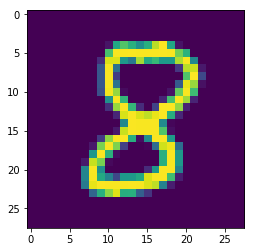

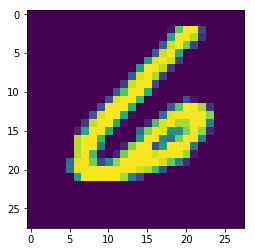

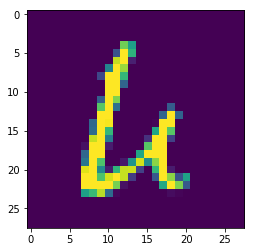

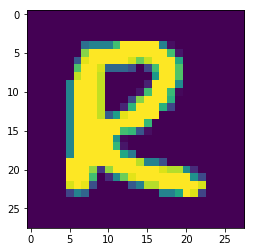

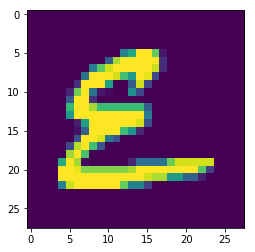

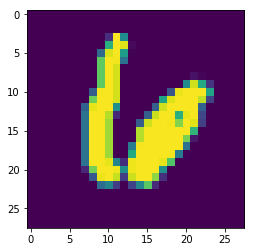

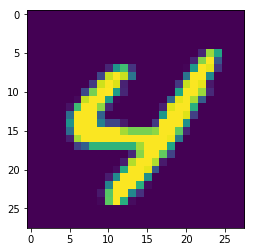

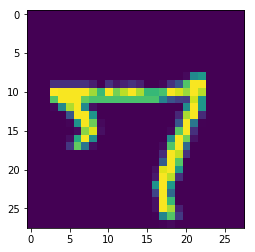

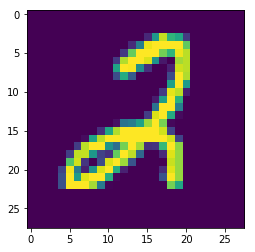

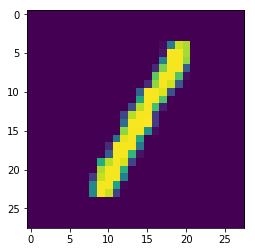

In [54]:
for i in X_test[:10]:
    k=np.argmax(model.predict(i.reshape(1,28,28,1)))
    im=i.reshape(28,28)
    plt.figure()
    print(dic[k])
    plt.imshow(im)
    
    
    

In [208]:
model.save('OCRmodel.h5')

In [3]:
from keras.models import load_model
import cv2 as cv
import imutils
from imutils.contours import sort_contours

In [4]:
model=load_model('OCRmodel.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               80100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
__________

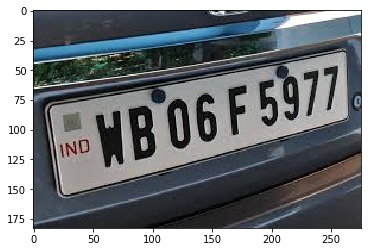

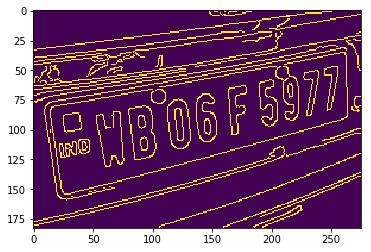

In [36]:
image = cv.imread('npmberplate.jpg')
plt.figure()
plt.imshow(image)

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

blurred = cv.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv.Canny(blurred, 30, 150)

plt.figure()
plt.imshow(edged)
cnts = cv.findContours(edged.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

In [37]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv.boundingRect(c)
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv.threshold(roi, 0, 255,
			cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape
		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=28)
		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=28)
		# re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 28x28
		
		dX = int(max(0, 28 - tW) / 2.0)
		dY = int(max(0, 28 - tH) / 2.0)
		# pad the image and force 32x32 dimensions
		padded = cv.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv.resize(padded, (28, 28))
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))
   

In [38]:
boxes = [b[1] for b in chars]
charsd = np.array([c[0] for c in chars], dtype="float32")

In [39]:
preds=model.predict(charsd)

In [40]:
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

In [42]:
for (pred, (x, y, w, h)) in zip(preds, boxes):
    # find the index of the label with the largest corresponding
    # probability, then extract the probability and label
    i = np.argmax(pred)
    prob = pred[i]
    label = labelNames[i]
    # draw the prediction on the image
    print("[INFO] {} - {:.2f}%".format(label, prob * 100))
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv.putText(image,str(label), (x - 10, y - 10),cv.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 2)
    
    # show the image
    cv.imshow("Image", image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

[INFO] M - 49.04%
[INFO] M - 26.60%
[INFO] O - 42.20%
[INFO] 8 - 28.68%
[INFO] B - 84.11%
[INFO] 2 - 52.34%
[INFO] N - 73.40%
[INFO] D - 52.94%
[INFO] 6 - 59.77%
[INFO] N - 67.18%
[INFO] F - 76.71%
[INFO] Z - 42.66%
[INFO] U - 89.49%
[INFO] 5 - 99.36%
[INFO] U - 24.59%
[INFO] O - 37.55%
[INFO] 7 - 95.93%
[INFO] 7 - 95.91%
[INFO] L - 35.25%


In [43]:
cv.destroyAllWindows()



